In [1]:
### CSS for notebook styling ###
from IPython.core.display import HTML

HTML('''
<style>
    :root {
        --box_color: #FEFCF3;
    }
    body[data-jp-theme-light="true"] .jp-Notebook .CodeMirror.cm-s-jupyter{
        background-color: var(--box_color) !important;
    }
    div.input_area{
        background-color: var(--box_color) !important;
    }
</style>
''')

<center><div class="alert alert-block alert-warning" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 22px;color: #E90064;"> 📣 &nbsp; IF YOU FORK THIS OR FIND THIS HELPFUL &nbsp; 📣</b><br><br><b style="font-size: 22px; color: #E90064">⬆️ PLEASE UPVOTE! ⬆️</b>
</div></center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Overview
    </h1>
    </div>
</center>

<p style = "font-size:15px; text-align:justify;">
This is my first notebook to do image semantic segmentation task. Semantic segmentation is classifying each pixels of an image. The data consist images and masks annotations in JSON. I try to use U-Net and U&sup2-Net with TensorFlow framework to predict mask of the image. Images consists of football players in different camera angle shot. In this notebook, I split the images and masks intoto 486 images (95% of dataset) for training and 26 images (5% of dataset) for testing. If you wanna make model predict more accurate, you can do data augmentation for training images. </p>

<a class='anchor' id='top'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Table of Contents
    </h1>
    </div>
</center>
  
  
- <a href="#theory" style="font-size: 15px;">The Theory</a>
- <a href="#library" style="font-size: 15px;">Import Libraries</a>
- <a href="#visual" style="font-size: 15px;">Dataset</a>
- <a href="#data_pre" style="font-size: 15px;">Data Preparation</a>
- <a href="#model" style="font-size: 15px;">Build Model</a>
- <a href="#test" style="font-size: 15px;">Test Model</a>
- <a href="#evaluation" style="font-size: 15px;">Evaluation</a>

<a class='anchor' id='theory'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">The Theory<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>

<h2>U-NET</h2>
<p><img style="float:right; max-height:400px" src="https://i.pinimg.com/564x/5e/81/33/5e81332d9d53e725d58b2404a6878ee8.jpg"></p>
<p style="font-size:15px; text-align:justify;">
U-Net is an architecture developed by Olaf Ronneberger, Philipp Fischer, and Thomas Brox for Biomedical image segmentation. They won the ISBI (International Symposium on Biomedical Imaging) cell tracking challenge 2015 in New York. You can read a paper <a href="https://arxiv.org/pdf/1505.04597.pdf">here</a> for more information.<br> <h3>U-Net Architecture</h3>It is named as "U-Net" cause it has U-shape network architecture. U-Net architecture consists of three parts :  contracting path or encode (left side), expansive path or decode (right side), and skip connection.<br>
<b>Contracting Path or Encoder</b><br>
The Contracting Path or Encoder acts as a feature extractor. The Encoder consists of two convolutional layers with downsampling using a 3x3 filter size, ReLU activation, and a 2x2 max pooling operation. The Encoder step is repeated four times, with the number of features increasing by a factor of two at each step (64, 128, 256, 512). In this step, the output of the last convolutional layer in each Encoder cycle is transferred over the skip connection.
<br><b>Skip Connections</b><br>
Skip connections are used to retain spatial information because the Encoder reduces the spatial information from the input. Skip connections involve concatenating the feature maps from the Encoder to the output of the corresponding Transposed Convolutional layer. This process occurs within the same step of the architecture.
<br><b>Bridge</b><br>
Bridge in U-Net refers to the middle part of the architecture that connects the encoder and de coder. It consists of two 3x3 convolutions with 1024 number of filters, where each convolution is followed by a ReLU activation function.
<br><b>Expansive Path or Decoder</b><br>
Expansive path or decoder is responsible for upsampling the feature maps and generating the final output. Decoder uses transposed convolutional layers (also known as deconvolution layers). Decoder consist of 2x2 transposed convolutional and concatenate with the feature maps on skip connections. After that, two 3x3 convolutions are used, where each convolution is followed by a ReLU activation function. The output of the last decoder passes through a 1x1 convolution with sigmoid activation. The sigmoid activation function gives the segmentation mask representing the pixel-wise classification.
</p>

<h2>U&sup2-NET</h2>
<p style="font-size:15px; text-align:justify;">
U&sup2-Net or U2-Net or U-shaped Net is a U-Net like architecture. U2-Net is a two-level nested U-structure architecture that is designed for salient object detection (SOD). The architecture allows the network to go deeper, attain high resolution, without significantly increasing the memory and computation cost. This is achieved by a nested U-structure: on the bottom level, with a novel ReSidual U-block (RSU) module, which is able to extract intra-stage multi-scale features without degrading the feature map resolution; on the top level, there is a U-Net like structure, in which each stage is filled by a RSU block <a href = "https://paperswithcode.com/method/u2-net">[Source : PaperWithCode]</a>. You can read their <a href="https://arxiv.org/pdf/2005.09007.pdf">paper here</a> or <a href="https://github.com/xuebinqin/U-2-Net">github page here</a> for more information. </p>
<p><img style="float:right; margin:5px; padding:5px; max-height:350px" src="https://i.pinimg.com/564x/99/55/a9/9955a9a368148d72f6417f93a93d0b4f.jpg"></p>
<h3>Residual U-Block (RSU-L)</h3>
<p style="font-size:15px; text-align:justify;">
    RSU-L used to capture intra-stage multi-scale features. The structure of <code>RSU-L (C<sub>in</sub>, M, C<sub>out</sub>)</code> is shown in Fig. 1, where <code>L</code> is the number of layers in the encoder, <code>C<sub>in</sub>, C<sub>out</sub></code> denote input and output channels, and <code>M</code> denotes the number of channels in the internal layers of RSU. 
<ol>Three components of RSU-L :
  <li>Input convolutional layers, this step convert a feature map <code>(H × W × C<sub>in</sub>)</code> to intermediate map, this is a plain convolutional layer for local feature extraction. This step consists of convolutional layer with 3x3 filter size, Batch Normalization, and ReLU activation.</li>
  <li>Encoder (downsampling) - Decoder (upsampling) U-Net like. In this step, the input is the output of step one and learns to extract and encode the multi-scale contextual information. The <code>L</code> letter in RSU-L refers to the depth of architecture (shown in Fig. 1 [L = 7, it's mean RSU-7]).  Larger <code>L</code> leads to deeper residual U-block (RSU), more pooling operations, larger range of receptive fields and richer local and global features. The output of downsampling at each level will be saved for skip connections, and concatenate in decoder for the better output. Same as downsampling, the decoder use progressive upsampling, to avoid loss of detail caused by direct upsampling with large scales.</li>
  <li>The Add layers fuse local features (output of step one) and the multi-scale features (output of step two) to produce the output.</li>
</ol>
</p>
<p><img style="float:right; margin:0px; padding:0px; max-height:350px" src="https://i.pinimg.com/564x/c2/f2/28/c2f228d178cd2b988b76ecc21321825a.jpg"></p>
<h3>U&sup2;-Net Architecture</h3>
<p>The U2-Net architecture is like U-Net but consists of Residual U-Block (RSU-L) at each stage, while U-Net use convolutional block. U&sup2-Net is a nested U-structured with U<sup>n</sup>-Net formulation (n = 2). U2-Net mainly consists of three parts : a six stages encoder (some say last of them is a bridge), a five stages decoder, and saliency map fusion module attached with the decoder stages and the bridge stage.
</p>
    
<center>
    <img src="https://i.pinimg.com/564x/82/21/29/82212988f5ad8682eb049e6825178187.jpg" alt="U2-Net architecture">
    <figcaption style="text-align: center">Fig. 4: U2-Net has full (above) and lite (below) version</figcaption>
</center>
  
<p style="font-size:15px;
          text-align:left">  
    <code>I : Input Channels</code>
    <br><code>M : Intermediate Channels</code>
    <br><code>O : Output Channels</code>
</p>
<p>In (Fig. 4), U2-Net has 2 different values of <code>I, M, and O</code>,  but the structure of the RSU-L stage remains consistent throughout the network. <code>RSU-7, RSU-6, RSU-5, RSU-4, RSU-4F</code> are the encoders and types of RSU-L blocks used with different input parameters. Than, the 2 others <code>RSU-4F</code> are bridge and first decoder, the last three RSU-L <code>RSU-4, RSU-5, RSU-6, RSU-7</code> serve as decoders blocks. The last part, all of the outputs from bridge and decoders are concatenated to generate the final output using <code>sigmoid</code> activation function to classify.</p>

<div class="alert alert-info">📢 : Feel free for give feedback or correct any mistakes in my explanation</div>

<a class='anchor' id='library'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Import Libraries<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>

In [2]:
!pip install imantics --quiet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import json
import os
import imantics
from PIL import Image
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split

%matplotlib inline

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

<a class='anchor' id='visual'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Dataset<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>
    
<p style="font-size:15px;
          text-align:left">  
    <br><code>base_dir</code> : the root directory of this notebook
    <br><code>annote_dir</code> : the directory of annotations 
    <br><code>images_dir</code> : the directory of all images
</p>

In [4]:
base_dir = '/kaggle/input/football-player-segmentation'
annote_dir = f'{base_dir}/annotations/instances_default.json'
images_dir = f'{base_dir}/images' 

In [5]:
image_size = 512
input_image_size = (1920, 1080)

In [6]:
images_listdir = os.listdir(images_dir)
print(f"{blk}Dataset contains {red}{len(images_listdir)} {blk}images")

Dataset contains 512 images


In [7]:
def read_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img

In [8]:
random_images = np.random.choice(images_listdir, size = 9, replace = False)

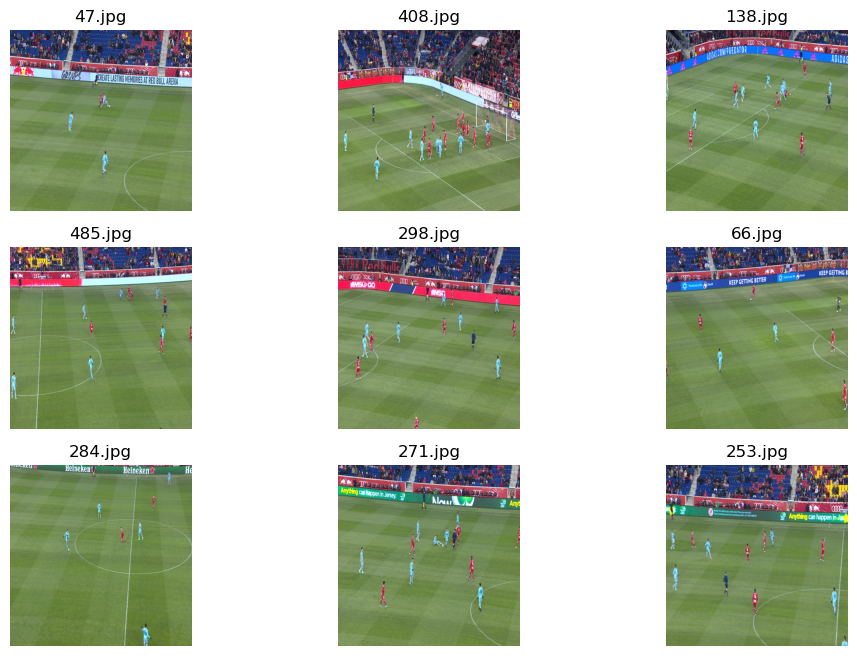

In [9]:
rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (12,8))

for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        img = read_image(f"{images_dir}/{random_images[i]}")
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

<a class='anchor' id='data_pre'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Data Preparation<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>

<div class="alert alert-info">
<b>Note : </b> I use code from <a href="https://www.kaggle.com/code/ihelon/football-player-segmentation-modeling">@YAROSLAV ISAIENKOV</a> to convert annotations from COCO JSON format to numpy array.
</div>

In [10]:
annote = json.load(open(annote_dir))

In [11]:
id_to_images = {image['id']:image['file_name'] for image in annote['images']}

In [12]:
images = np.zeros((len(images_listdir), image_size, image_size, 3), dtype=np.uint8)

for image_id, image_filename in id_to_images.items():
    cur_image = read_image(f"{images_dir}/{image_filename}")
    images[image_id - 1] = cur_image

In [13]:
masks = np.zeros((len(images_listdir), image_size, image_size, 1), dtype=bool)

for annotation in annote["annotations"]:
    image_id = annotation["image_id"]
    segmentation = annotation["segmentation"]

    cur_mask = imantics.Polygons(segmentation).mask(*input_image_size).array
    cur_mask = np.expand_dims(resize(cur_mask, (image_size, image_size), mode='constant', preserve_range=True), 2)

    mask_index = image_id - 1
    masks[mask_index] = masks[mask_index] | cur_mask

In [14]:
print(f"{blk}We have {red}{len(images)} {blk}images and {red}{len(masks)} {blk}masks ")

We have 512 images and 512 masks 


In [15]:
images_train, images_test, masks_train, masks_test = train_test_split(images, masks, test_size=0.05, random_state=42)

print(f"{blk}== Training set shapes == \n{blk}Images : {red}{images_train.shape}\n{blk}Masks : {red}{masks_train.shape}")
print(f"{blk}== Test set shapes == \n{blk}Images : {red}{images_test.shape}\n{blk}Masks : {red}{masks_test.shape}")

== Training set shapes == 
Images : (486, 512, 512, 3)
Masks : (486, 512, 512, 1)
== Test set shapes == 
Images : (26, 512, 512, 3)
Masks : (26, 512, 512, 1)


In [16]:
random_numbers = [random.randint(0, 511) for _ in range(9)]

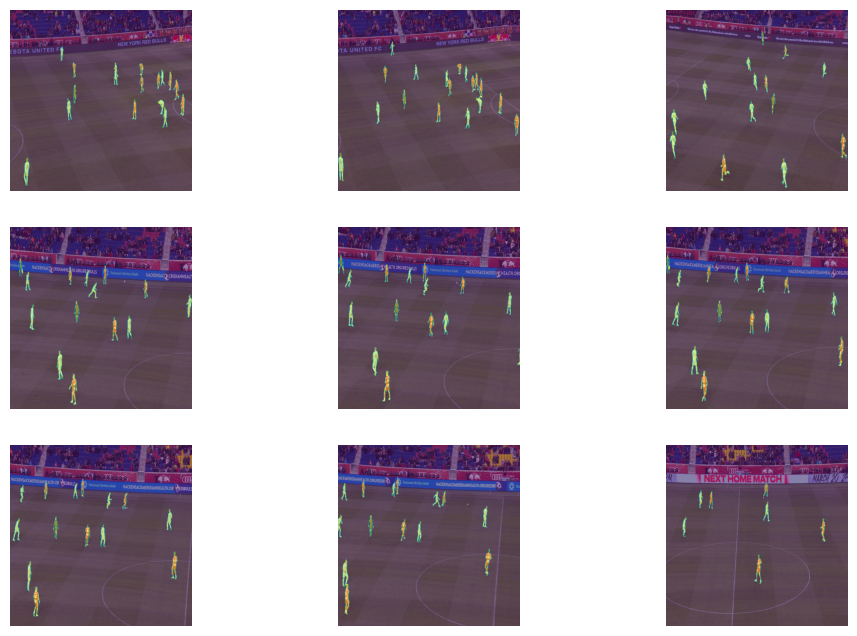

In [17]:
fig, ax = plt.subplots(rows, cols, figsize = (12,8))

for i, ax in enumerate(ax.flat):
    if i < len(random_numbers):
        ax.imshow(images[i])
        ax.imshow(masks[i], alpha=0.5)
        ax.axis('off')

<a class='anchor' id='model'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Training Models<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>

<h2>U-NET</h2>

In [18]:
def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2, 2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def Unet(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)

    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)

    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

unet_model = Unet((512, 512, 3))
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [19]:
unet_result = unet_model.fit(images_train, masks_train, validation_split = 0.2, batch_size = 4, epochs = 5)

Epoch 1/5
97/97 [==============================] - 71s 498ms/step - loss: 0.0939 - accuracy: 0.9844 - val_loss: 6.0583 - val_accuracy: 0.6619
Epoch 2/5
97/97 [==============================] - 48s 496ms/step - loss: 0.0223 - accuracy: 0.9966 - val_loss: 0.0236 - val_accuracy: 0.9962
Epoch 3/5
97/97 [==============================] - 48s 498ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.0121 - val_accuracy: 0.9974
Epoch 4/5
97/97 [==============================] - 48s 498ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0099 - val_accuracy: 0.9973
Epoch 5/5
97/97 [==============================] - 48s 498ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0081 - val_accuracy: 0.9974


<h2>U&sup2-Net</h2>

In [20]:
def conv_block(shape, out_ch, rate=1):
    x = tf.keras.layers.Conv2D(out_ch, 3, padding="same", dilation_rate=1)(shape)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    return x

def RSU_L(shape, out_ch, M_ch, num_layers, rate=2):
    x = conv_block(shape, out_ch)
    inp_ch = x

    skip_features = []
    x = conv_block(x, M_ch)
    skip_features.append(x)

    for i in range(num_layers-2):
        x = tf.keras.layers.MaxPool2D((2, 2))(x)
        x = conv_block(x, M_ch)
        skip_features.append(x)
        
    x = conv_block(x, M_ch, rate=rate)
    skip_features.reverse()
    x = tf.keras.layers.Concatenate()([x, skip_features[0]])
    x = conv_block(x, M_ch)

    for i in range(num_layers-3):
        x = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)
        x = tf.keras.layers.Concatenate()([x, skip_features[i+1]])
        x = conv_block(x, M_ch)

    x = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)
    x = tf.keras.layers.Concatenate()([x, skip_features[-1]])
    x = conv_block(x, out_ch)

    x = tf.keras.layers.Add()([x, inp_ch])
    return x

def RSU_4F(shape, out_ch, M_ch):
    x0 = conv_block(shape, out_ch, rate=1)

    x1 = conv_block(x0, M_ch, rate=1)
    x2 = conv_block(x1, M_ch, rate=2)
    x3 = conv_block(x2, M_ch, rate=4)

    x4 = conv_block(x3, M_ch, rate=8)

    x = tf.keras.layers.Concatenate()([x4, x3])
    x = conv_block(x, M_ch, rate=4)

    x = tf.keras.layers.Concatenate()([x, x2])
    x = conv_block(x, M_ch, rate=2)

    x = tf.keras.layers.Concatenate()([x, x1])
    x = conv_block(x, out_ch, rate=1)

    x = tf.keras.layers.Add()([x, x0])
    return x

def u2net(shape, out_ch, M_ch, num_classes=1):
    inputs = tf.keras.layers.Input(shape)

    e1 = RSU_L(inputs, out_ch[0], M_ch[0], 7)
    p1 = tf.keras.layers.MaxPool2D((2, 2))(e1)

    e2 = RSU_L(p1, out_ch[1], M_ch[1], 6)
    p2 = tf.keras.layers.MaxPool2D((2, 2))(e2)

    e3 = RSU_L(p2, out_ch[2], M_ch[2], 5)
    p3 = tf.keras.layers.MaxPool2D((2, 2))(e3)

    e4 = RSU_L(p3, out_ch[3], M_ch[3], 4)
    p4 = tf.keras.layers.MaxPool2D((2, 2))(e4)

    e5 = RSU_4F(p4, out_ch[4], M_ch[4])
    p5 = tf.keras.layers.MaxPool2D((2, 2))(e5)

    b1 = RSU_4F(p5, out_ch[5], M_ch[5])
    b2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(b1)

    d1 = tf.keras.layers.Concatenate()([b2, e5])
    d1 = RSU_4F(d1, out_ch[6], M_ch[6])
    u1 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d1)

    d2 = tf.keras.layers.Concatenate()([u1, e4])
    d2 = RSU_L(d2, out_ch[7], M_ch[7], 4)
    u2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d2)

    d3 = tf.keras.layers.Concatenate()([u2, e3])
    d3 = RSU_L(d3, out_ch[8], M_ch[8], 5)
    u3 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d3)

    d4 = tf.keras.layers.Concatenate()([u3, e2])
    d4 = RSU_L(d4, out_ch[9], M_ch[9], 6)
    u4 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(d4)

    d5 = tf.keras.layers.Concatenate()([u4, e1])
    d5 = RSU_L(d5, out_ch[10], M_ch[10], 7)

    
    y1 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d5)

    y2 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d4)
    y2 = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(y2)

    y3 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d3)
    y3 = tf.keras.layers.UpSampling2D(size=(4, 4), interpolation="bilinear")(y3)

    y4 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d2)
    y4 = tf.keras.layers.UpSampling2D(size=(8, 8), interpolation="bilinear")(y4)

    y5 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(d1)
    y5 = tf.keras.layers.UpSampling2D(size=(16, 16), interpolation="bilinear")(y5)

    y6 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(b1)
    y6 = tf.keras.layers.UpSampling2D(size=(32, 32), interpolation="bilinear")(y6)

    y0 = tf.keras.layers.Concatenate()([y1, y2, y3, y4, y5, y6])
    y0 = tf.keras.layers.Conv2D(num_classes, 3, padding="same")(y0)

    y0 = tf.keras.layers.Activation("sigmoid")(y0)
    y1 = tf.keras.layers.Activation("sigmoid")(y1)
    y2 = tf.keras.layers.Activation("sigmoid")(y2)
    y3 = tf.keras.layers.Activation("sigmoid")(y3)
    y4 = tf.keras.layers.Activation("sigmoid")(y4)
    y5 = tf.keras.layers.Activation("sigmoid")(y5)
    y6 = tf.keras.layers.Activation("sigmoid")(y6)

    model = tf.keras.models.Model(inputs, outputs=y0, name="U2-Net")
    return model

def build_u2net(input_shape, num_classes=1):
    out_ch = [64, 128, 256, 512, 512, 512, 512, 256, 128, 64, 64]
    M_ch = [32, 32, 64, 128, 256, 256, 256, 128, 64, 32, 16]
    model = u2net(input_shape, out_ch, M_ch, num_classes=num_classes)
    return model

def build_u2net_lite(input_shape, num_classes=1):
    out_ch = [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
    M_ch = [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
    model = u2net(input_shape, out_ch, M_ch, num_classes=num_classes)
    return model

u2net_model = build_u2net((image_size, image_size, 3))
u2net_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
u2net_model.summary()

Model: "U2-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 512, 512, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                            

In [21]:
u2net_result = u2net_model.fit(images_train, masks_train, validation_split = 0.2, batch_size = 4, epochs = 5)

Epoch 1/5
97/97 [==============================] - 137s 604ms/step - loss: 0.1396 - accuracy: 0.9736 - val_loss: 81840.2578 - val_accuracy: 0.9810
Epoch 2/5
97/97 [==============================] - 55s 566ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 1.7084 - val_accuracy: 0.9891
Epoch 3/5
97/97 [==============================] - 55s 566ms/step - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0107 - val_accuracy: 0.9963
Epoch 4/5
97/97 [==============================] - 56s 580ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0068 - val_accuracy: 0.9974
Epoch 5/5
97/97 [==============================] - 55s 566ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0061 - val_accuracy: 0.9976


<a class='anchor' id='test'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F7C04A;
           font-size:110%;
           font-family:system-ui;
           letter-spacing:0.5px">
    <h1 style = "color:#3F497F; padding:10px;">Test Models<a href="#top" style="color:#3F497F;"> ↑ </a>
    </h1>
    </div>
</center>

In [22]:
unet_predict = unet_model.predict(images_test)

1/1 [==============================] - 10s 10s/step


In [42]:
unet_predict = (unet_predict > 0.5).astype(np.uint8)

In [23]:
u2net_predict = u2net_model.predict(images_test)

1/1 [==============================] - 7s 7s/step


In [43]:
u2net_predict = (u2net_predict > 0.5).astype(np.uint8)

In [51]:
def show_result(og, unet, u2net, target):
    fig, axs = plt.subplots(1, 4, figsize=(10,5))
    axs[0].set_title("Original")
    axs[0].imshow(og)
    axs[0].axis('off')
    
    axs[1].set_title("U-Net")
    axs[1].imshow(unet)
    axs[1].axis('off')
    
    axs[2].set_title("U2-Net")
    axs[2].imshow(u2net)
    axs[2].axis('off')
    
    axs[3].set_title("Ground Truth")
    axs[3].imshow(target)
    axs[3].axis('off')

    plt.show()

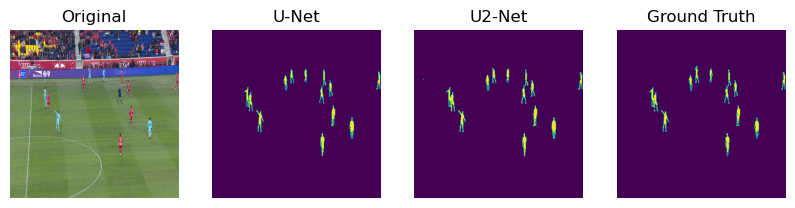

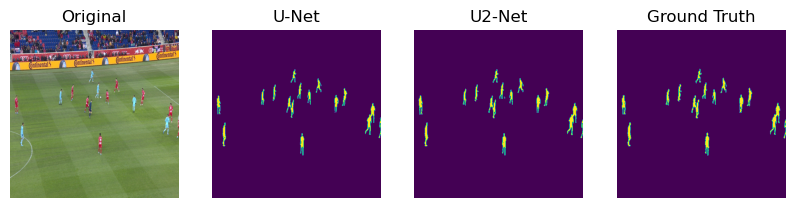

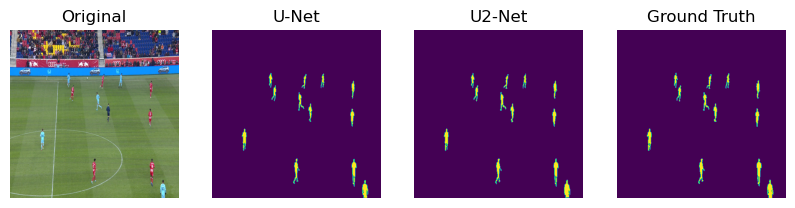

In [54]:
show_test_idx = random.sample(range(26), 3)
for idx in show_test_idx: 
    show_result(images_test[idx], unet_predict[idx], u2net_predict[idx], masks_test[idx])